In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import numpy as np
import simple_angles_dataset_generator as simple_angles_gen
from mcu_original import MCUOriginalModel
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots

In [67]:
figure_num = 20**2
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 2
noise_level = 0
lw = np.array([10, -75])
up = np.array([170, 75])
param_names = np.array(["inside_angle", "rotation_angle_x"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, simple_angles_gen.generate_angles_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
mcu_model = MCUOriginalModel(k=5, c=10000, figures=figures, params=control_vars, params_names=param_names)


In [70]:
mcu_model.train(max_iters=100)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

KeyboardInterrupt: 

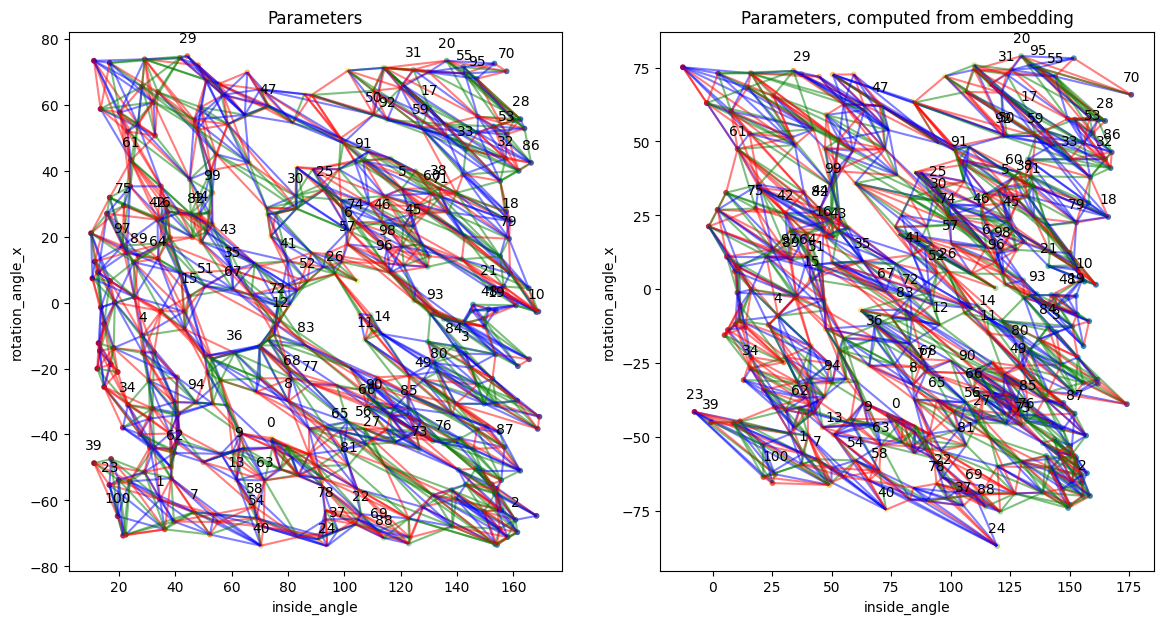

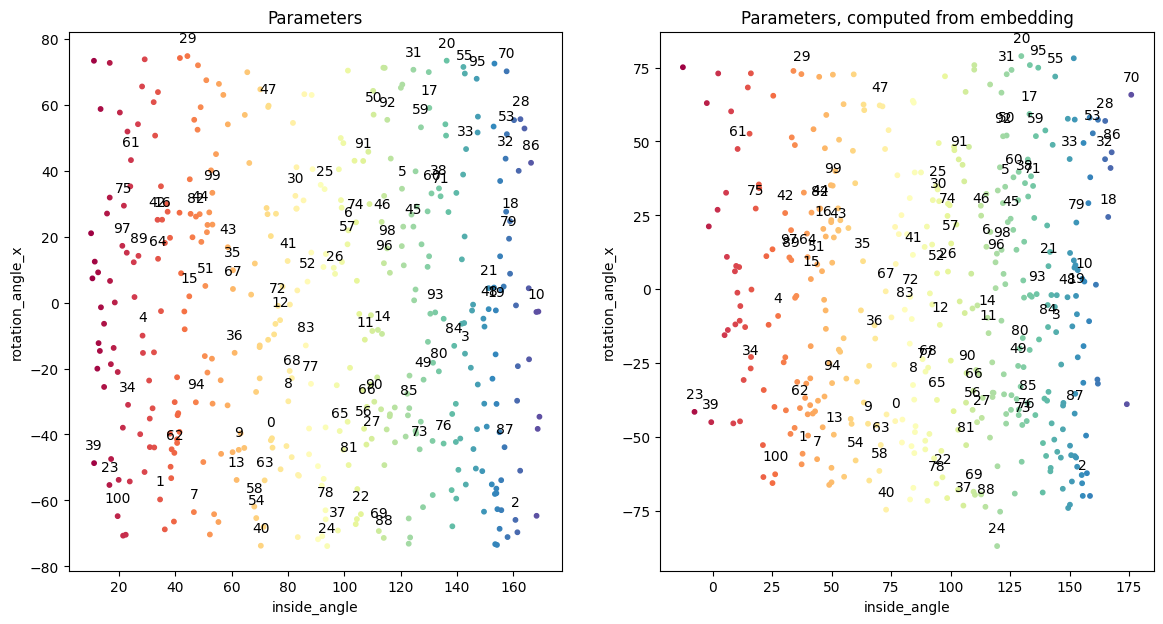

In [69]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=True)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=True)

In [65]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt, noise_level, pieces_cnt=10, test_data_size=20, same_value=False)

Finding neighbors: 2 ms , optimization: 1 ms
-----------
x_opt  = [ 17.30293695 -61.43347348], x_err = 27.615524077963414
x_real = [ 14.87978839 -71.36730504]
Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [ 15.2726528  -59.84844395], x_err = 33.12715112151607
x_real = [ 13.12134874 -68.18514303]
Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [ 20.30605824 -50.05630072], x_err = 19.730084887083052
x_real = [ 25.98394871 -60.09328018]
Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [ 17.7247548  -62.16257379], x_err = 9.480304354538198
x_real = [ 10.17179926 -66.58774   ]
Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [ 19.45054012 -62.01610855], x_err = 18.163899250015284
x_real = [ 17.65890039 -73.22092452]
Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [ 17.10350103 -52.59080172], x_err = 7.836005010602848
x_real = [ 24.35396516 -65.12847789]
Finding neighbors: 1 ms , optimization: 1 ms
----

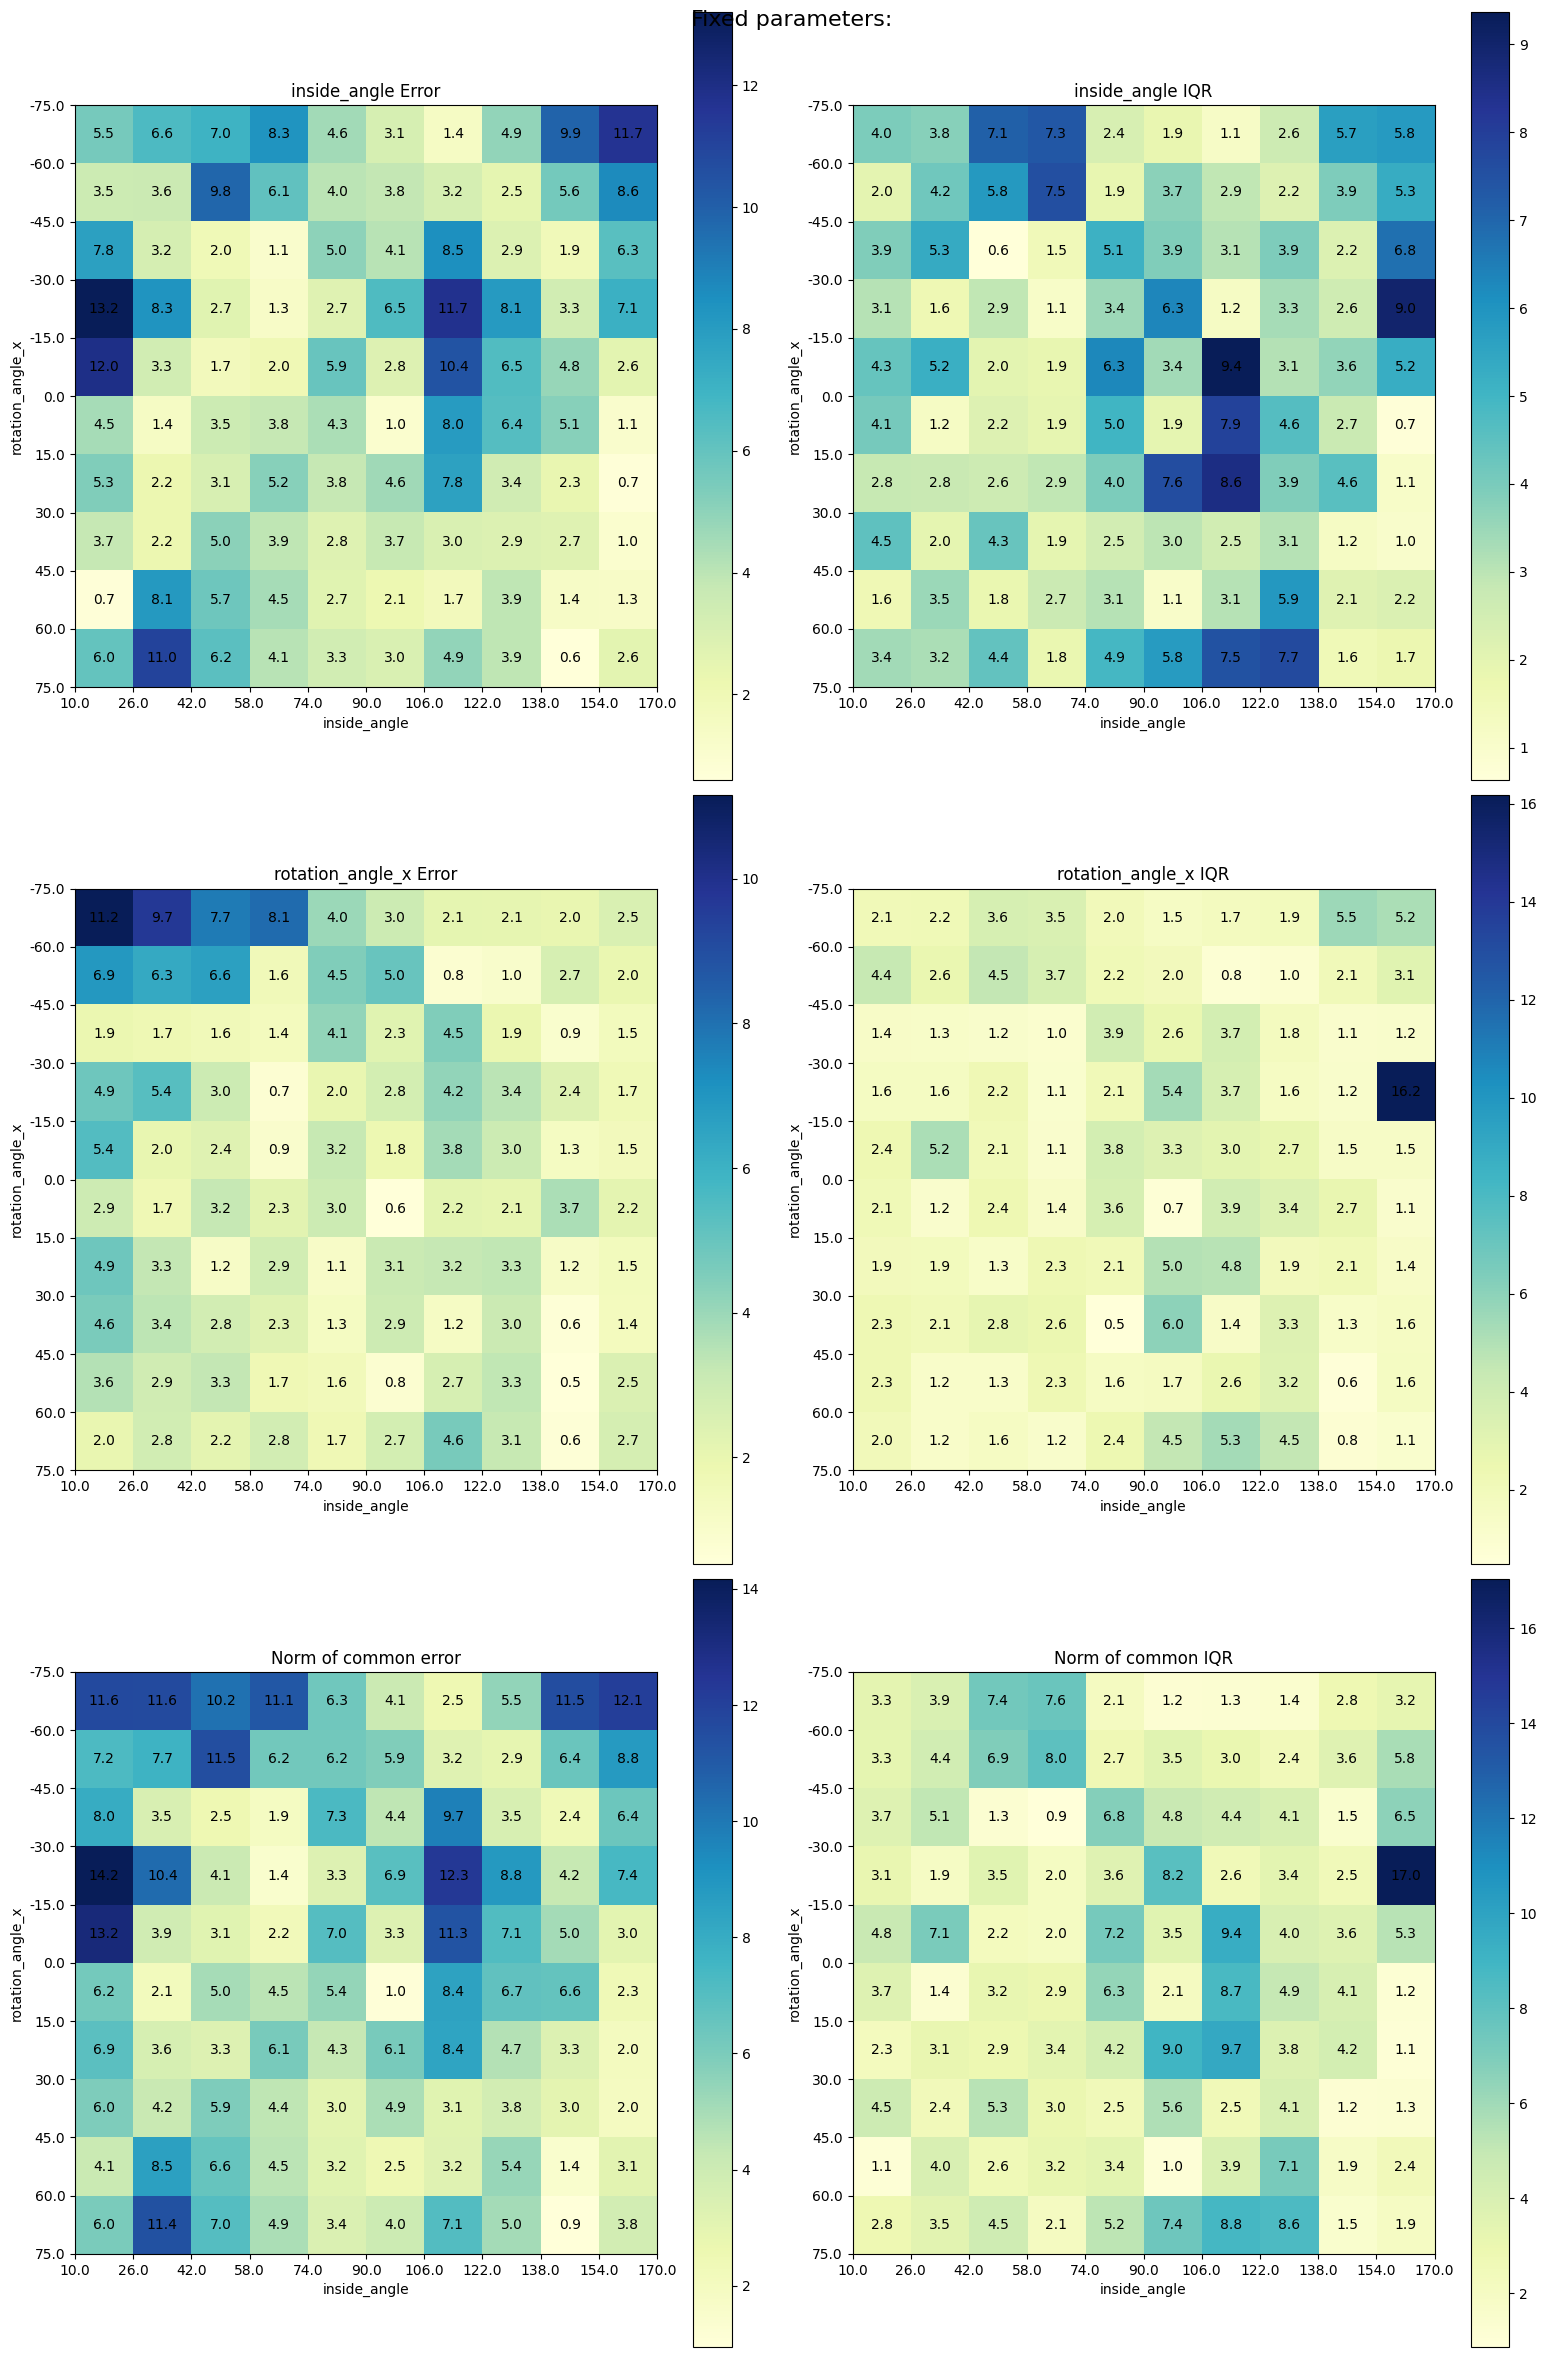

In [71]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, filename="images/orig_angle_2d.png")

28.537808058369038 121.20450821198536 -1.4578264571821222 44.454005725279146


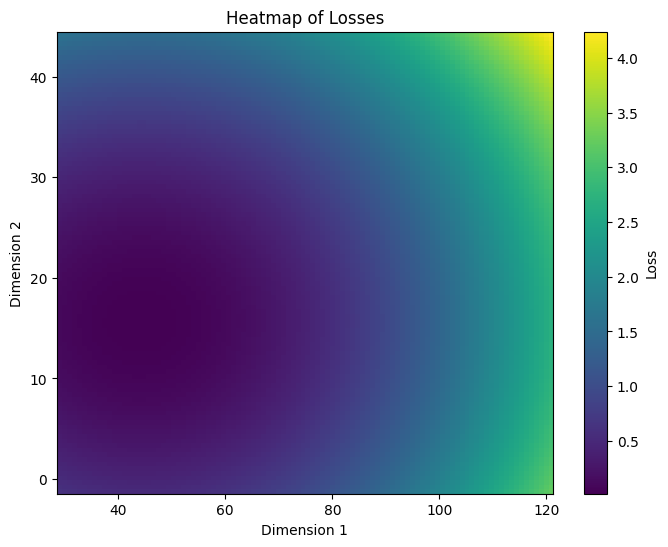

Finding neighbors: 885 ms , optimization: 167 ms
x_opt = [43.78595537 15.57136088], x_err = 0.01698502067082139
x_real = [45 15]
28.537808058369038 121.20450821198536 -1.4578264571821222 44.454005725279146


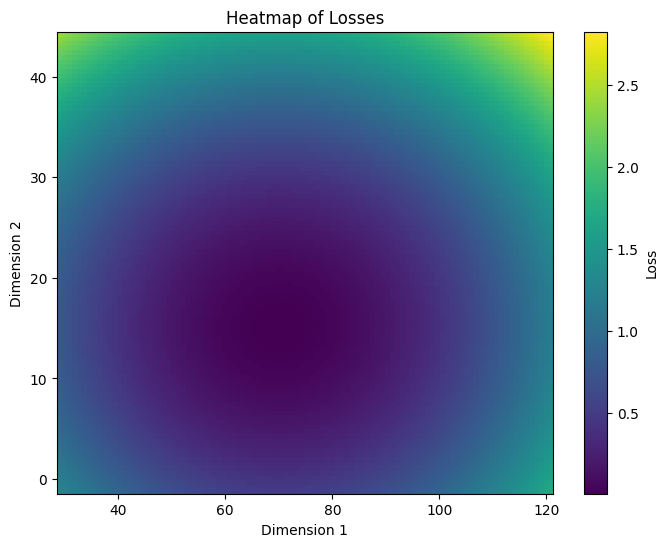

Finding neighbors: 707 ms , optimization: 162 ms
x_opt = [69.93192519 15.09417158], x_err = 0.004844861128824083
x_real = [70 15]


In [81]:
test_control_vars = np.array([[45, 15], [70, 15]])
test_control_vars_dict = dataset_generator.put_control_vars_in_dict(test_control_vars, p,
                                                                    mcu_model.params_names)
test_figures = dataset_generator.generate_array_of_figures(test_control_vars_dict, simple_angles_gen.generate_angles_points,
                                                           noise_level=noise_level,
                                                           min_num_points=1000)
x_opts = []
for (figure, control_var) in zip(test_figures, test_control_vars):
    x_opt, x_err = mcu_model.predict(figure, gd = False, plot_loss=True)
    print(f"x_opt = {x_opt}, x_err = {x_err}" )
    print(f"x_real = {control_var}")